## <span style="color:yellow"> Objective: Read and import the API into DataFrame </span>

[Go to USGS API documentation](https://earthquake.usgs.gov/fdsnws/event/1/)

   - [Importing the required libraries](#cell_ref_0)
   - [Reading the geojson files from USGS API](#cell_ref_1)
   - [No null value](#cell_ref_1)
   - [The data type seems correct, except for salesdate](#cell_ref_1)
   - [Converted the sale_date to datetime and added a few date features](#cell_ref_2)
   - [sq_ft and price have negative values, so they need to be fixed. I simply converted values to absolutes](#cell_ref_3)
   - [171 rows had 0 (sq_ft, bed, bath) which probab. means land, so I replaced the zeros with mean values for those columns](#cell_ref_4)
   - [Still latitude and longitude seem to be swapped for some rows, so swapped those](#cell_ref_5)
    

- <span style="color:green"> - The data seems <em>**clean**</em> now. So, moving to modeling. </span>

<a id='cell_ref_0'></a>

In [11]:
import requests
import json
import pandas as pd
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

- Function for EQ json reading

<a id='cell_ref_1'></a>

In [12]:
def get_EQ_USGS(*arg):
    
    baseurl = 'https://earthquake.usgs.gov/fdsnws/event/1/query?'
    
    params_diction={}
    
    params_diction['format'] = get_format
    
    params_diction['starttime'] = min_date
    params_diction['endtime'] = max_date
    
    params_diction['minmagnitude'] = min_magnitude
    params_diction['maxmagnitude'] = max_magnitude
    
    params_diction['minlatitude'] = min_latitude
    params_diction['maxlatitude'] = max_latitude
    params_diction['minlongitude'] = min_longitude
    params_diction['maxlongitude'] = max_longitude
    
    params_diction['orderby'] = order_by
    
    params_diction['limit'] = limit_data
    
    resp = requests.get(baseurl, params=params_diction)
    
    return resp.json()


- Parameterically reading the json data for Earthquakes

In [19]:
get_format = "geojson" # Format for importing data

min_date = "1989-10-15" # Minimum date for reporting the data
max_date = "1989-10-19" # Maximum date for reporting the data

min_magnitude = "1" # Minimum magnitude of the reporting data
max_magnitude = "10" # Maximum magnitude of the reporting data

min_latitude = "32" # Minimum latitude
max_latitude = "42" # Maximum latitude

min_longitude = "-126" # Minimum longitude
max_longitude = "-114" # Maximum longitude

order_by = "time" # Ordering the data by parameters
limit_data = "200" # Maximum number of data

Params = [get_format, min_date, max_date, min_magnitude, max_magnitude, 
          min_latitude, max_latitude, min_longitude, max_longitude, order_by, 
          limit_data]

USGS_EQ_data_pull = get_EQ_USGS(Params)

USGS_data_json = (json.dumps(USGS_EQ_data_pull));

In [20]:
print(USGS_EQ_data_pull.keys())

dict_keys(['type', 'metadata', 'features', 'bbox'])


In [21]:
print(USGS_EQ_data_pull["type"])

FeatureCollection


In [22]:
print(json.dumps(USGS_EQ_data_pull["metadata"], indent=2))

{
  "generated": 1597276209000,
  "url": "https://earthquake.usgs.gov/fdsnws/event/1/query?format=geojson&starttime=1989-10-15&endtime=1989-10-19&minmagnitude=1&maxmagnitude=10&minlatitude=32&maxlatitude=42&minlongitude=-126&maxlongitude=-114&orderby=time&limit=200",
  "title": "USGS Earthquakes",
  "status": 200,
  "api": "1.10.3",
  "limit": 200,
  "offset": 1,
  "count": 200
}


In [23]:
print(json.dumps(USGS_EQ_data_pull["features"][0], indent=2)) # Printing only the first element of the list

{
  "type": "Feature",
  "properties": {
    "mag": 1.42,
    "place": "Northern California",
    "time": 624757977010,
    "updated": 1481291793752,
    "tz": null,
    "url": "https://earthquake.usgs.gov/earthquakes/eventpage/nc263323",
    "detail": "https://earthquake.usgs.gov/fdsnws/event/1/query?eventid=nc263323&format=geojson",
    "felt": null,
    "cdi": null,
    "mmi": null,
    "alert": null,
    "status": "reviewed",
    "tsunami": 0,
    "sig": 31,
    "net": "nc",
    "code": "263323",
    "ids": ",nc263323,",
    "sources": ",nc,",
    "types": ",nearby-cities,origin,phase-data,",
    "nst": 11,
    "dmin": 0.02342,
    "rms": 0.03,
    "gap": 70,
    "magType": "md",
    "type": "earthquake",
    "title": "M 1.4 - Northern California"
  },
  "geometry": {
    "type": "Point",
    "coordinates": [
      -121.9451667,
      37.1483333,
      6.129
    ]
  },
  "id": "nc263323"
}


In [24]:
print(USGS_EQ_data_pull["bbox"])

[-122.6263333, 32.741, -1.75, -115.51, 38.8305, 19.836]


# Step 1: Converting the imported "feature" json data into pandas dataframe

In [25]:
USGS_EQ_features = USGS_EQ_data_pull["features"]

- Taking it into pandas

In [26]:
df_eq = pd.DataFrame(USGS_EQ_features,
                        )

df_eq.head()

,type,properties,geometry,id
0,Feature,"{'mag': 1.42, 'place': 'Northern California', ...","{'type': 'Point', 'coordinates': [-121.9451667...",nc263323
1,Feature,"{'mag': 1.85, 'place': 'Northern California', ...","{'type': 'Point', 'coordinates': [-121.7233333...",nc263322
2,Feature,"{'mag': 1.98, 'place': 'Northern California', ...","{'type': 'Point', 'coordinates': [-122.0328333...",nc263321
3,Feature,"{'mag': 2.09, 'place': 'Northern California', ...","{'type': 'Point', 'coordinates': [-121.8541667...",nc20091394
4,Feature,"{'mag': 1.65, 'place': 'Northern California', ...","{'type': 'Point', 'coordinates': [-121.6363333...",nc20091383


In [33]:
df_eq["geometry"][0]["coordinates"]

[-121.9451667, 37.1483333, 6.129]

Opening the nested json file

In [11]:
df_5 = pd.DataFrame()
cnt = 0

for i in df_eq:
    df_1 = df_eq[i]
    
    df_2 = pd.DataFrame([j for j in df_1])
    
    df_3 = df_2["properties"]
    
    df_4 = pd.DataFrame([j for j in df_3])
    
    df_5= df_5.append(df_4)

df_eq_parsed_properties = df_5

In [30]:
df_eq_parsed_properties.tail()

,mag,place,time,updated,tz,url,detail,felt,cdi,mmi,...,ids,sources,types,nst,dmin,rms,gap,magType,type,title
0,1.00,"32 km SE of Mina, Nevada",1595379277150,1595380104078,None,https://earthquake.usgs.gov/earthquakes/eventp...,https://earthquake.usgs.gov/fdsnws/event/1/que...,None,None,None,...,",nn00761974,",",nn,",",origin,phase-data,",12,0.02300,0.11,98.11,ml,earthquake,"M 1.0 - 32 km SE of Mina, Nevada"
0,2.31,"12km S of Tres Pinos, CA",1595378814180,1595459583121,None,https://earthquake.usgs.gov/earthquakes/eventp...,https://earthquake.usgs.gov/fdsnws/event/1/que...,None,None,None,...,",nc73429226,",",nc,",",focal-mechanism,nearby-cities,origin,phase-da...",56,0.05034,0.13,82.00,md,earthquake,"M 2.3 - 12km S of Tres Pinos, CA"
0,1.70,"29 km S of Mina, Nevada",1595377751930,1595379324584,None,https://earthquake.usgs.gov/earthquakes/eventp...,https://earthquake.usgs.gov/fdsnws/event/1/que...,None,None,None,...,",nn00761970,",",nn,",",origin,phase-data,",14,0.04400,0.11,117.98,ml,earthquake,"M 1.7 - 29 km S of Mina, Nevada"
0,1.10,Nevada,1595377330520,1595377824195,None,https://earthquake.usgs.gov/earthquakes/eventp...,https://earthquake.usgs.gov/fdsnws/event/1/que...,None,None,None,...,",nn00761968,",",nn,",",origin,phase-data,",13,0.02400,0.11,78.07,ml,earthquake,M 1.1 - Nevada
0,1.37,"6km NW of The Geysers, CA",1595376213800,1595413265815,None,https://earthquake.usgs.gov/earthquakes/eventp...,https://earthquake.usgs.gov/fdsnws/event/1/que...,None,None,None,...,",nc73429206,",",nc,",",focal-mechanism,nearby-cities,origin,phase-da...",49,0.01028,0.05,43.00,md,earthquake,"M 1.4 - 6km NW of The Geysers, CA"


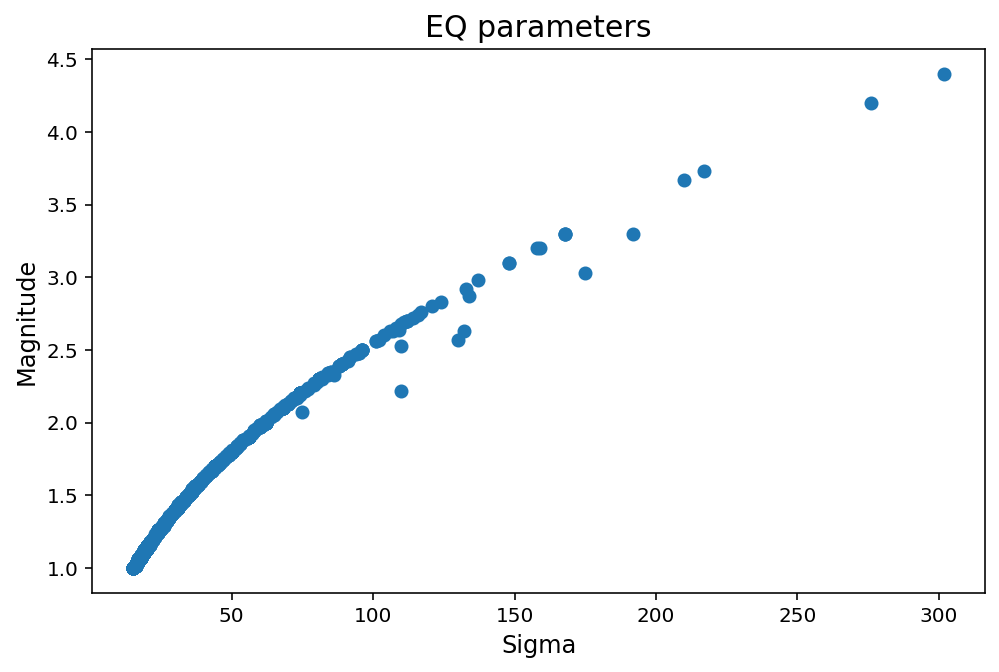

In [13]:
%config InlineBackend.figure_format = 'retina'

plt.figure(figsize = [8, 5])

plt.scatter(df_eq_parsed_properties.sig,df_eq_parsed_properties.mag);

# Format title and axis labels
plt.title("EQ parameters", fontsize = 15);

plt.xlabel("Sigma", fontsize = 12);
plt.ylabel("Magnitude", fontsize = 12);

# Step 2: importing the coordinates

In [14]:
df_eq[0]

0    {'type': 'Feature', 'properties': {'mag': 1.07...
Name: 0, dtype: object

In [15]:
df_5 = pd.DataFrame()
cnt = 0

for i in df_eq:
    df_1 = df_eq[i]
    
    df_2 = pd.DataFrame([j for j in df_1])
    
    df_3 = df_2["geometry"]
    
    df_4 = pd.DataFrame([j for j in df_3])
    
    df_5= df_5.append(df_4)

df_eq_parsed_geometry = df_5

In [16]:
#df_eq_parsed = df_eq_parsed.drop(columns=["url", "detail"])

df_eq_parsed_geometry.head()

,type,coordinates
0,Point,"[-117.6826667, 36.0761667, -0.29]"
0,Point,"[-117.9735, 38.002, 1.5]"
0,Point,"[-117.6818333, 35.0276667, 0.26]"
0,Point,"[-118.835, 37.4755, 2.04]"
0,Point,"[-117.7891, 38.1775, 5.3]"


In [17]:
df_EQ_processed = (pd.concat([df_eq_parsed_properties, df_eq_parsed_geometry], axis=1))
df_EQ_processed.reset_index(drop=True, inplace=True)
df_EQ_processed.head(2)

,mag,place,time,updated,tz,url,detail,felt,cdi,mmi,...,types,nst,dmin,rms,gap,magType,type,title,type,coordinates
0,1.07,"24km E of Coso Junction, CA",1595979450470,1596031631576,None,https://earthquake.usgs.gov/earthquakes/eventp...,https://earthquake.usgs.gov/fdsnws/event/1/que...,None,None,None,...,",nearby-cities,origin,phase-data,scitech-link,",10,0.08406,0.12,78.0,ml,earthquake,"M 1.1 - 24km E of Coso Junction, CA",Point,"[-117.6826667, 36.0761667, -0.29]"
1,1.30,"38 km NNE of Dyer, Nevada",1595979356340,1595980055067,None,https://earthquake.usgs.gov/earthquakes/eventp...,https://earthquake.usgs.gov/fdsnws/event/1/que...,None,None,None,...,",origin,phase-data,",16,0.07500,0.14,120.3,ml,earthquake,"M 1.3 - 38 km NNE of Dyer, Nevada",Point,"[-117.9735, 38.002, 1.5]"


In [18]:
df_EQ_processed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 961 entries, 0 to 960
Data columns (total 28 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   mag          961 non-null    float64
 1   place        961 non-null    object 
 2   time         961 non-null    int64  
 3   updated      961 non-null    int64  
 4   tz           0 non-null      object 
 5   url          961 non-null    object 
 6   detail       961 non-null    object 
 7   felt         32 non-null     object 
 8   cdi          32 non-null     object 
 9   mmi          9 non-null      object 
 10  alert        2 non-null      object 
 11  status       961 non-null    object 
 12  tsunami      961 non-null    int64  
 13  sig          961 non-null    int64  
 14  net          961 non-null    object 
 15  code         961 non-null    object 
 16  ids          961 non-null    object 
 17  sources      961 non-null    object 
 18  types        961 non-null    object 
 19  nst     

In [19]:
df_EQ_processed["url"][0]

'https://earthquake.usgs.gov/earthquakes/eventpage/ci38613802'

In [20]:
df_EQ_processed["coordinates"][0][0]

-117.6826667

In [21]:
len(df_EQ_processed)

961

In [22]:
long = [] 
lat =[] 
dep = []

for i in range(len(df_EQ_processed)):
    long.append(df_EQ_processed["coordinates"][i][0])
    lat.append(df_EQ_processed["coordinates"][i][1])
    dep.append(df_EQ_processed["coordinates"][i][2])

In [23]:
df_EQ_processed["longitude"] = long
df_EQ_processed["latitude"] = lat
df_EQ_processed["depth"] = dep



In [24]:
df_EQ_processed.head()

,mag,place,time,updated,tz,url,detail,felt,cdi,mmi,...,rms,gap,magType,type,title,type,coordinates,longitude,latitude,depth
0,1.07,"24km E of Coso Junction, CA",1595979450470,1596031631576,None,https://earthquake.usgs.gov/earthquakes/eventp...,https://earthquake.usgs.gov/fdsnws/event/1/que...,None,None,None,...,0.1200,78.00,ml,earthquake,"M 1.1 - 24km E of Coso Junction, CA",Point,"[-117.6826667, 36.0761667, -0.29]",-117.682667,36.076167,-0.29
1,1.30,"38 km NNE of Dyer, Nevada",1595979356340,1595980055067,None,https://earthquake.usgs.gov/earthquakes/eventp...,https://earthquake.usgs.gov/fdsnws/event/1/que...,None,None,None,...,0.1400,120.30,ml,earthquake,"M 1.3 - 38 km NNE of Dyer, Nevada",Point,"[-117.9735, 38.002, 1.5]",-117.973500,38.002000,1.50
2,1.74,"4km NW of Boron, CA",1595978829130,1595979076346,None,https://earthquake.usgs.gov/earthquakes/eventp...,https://earthquake.usgs.gov/fdsnws/event/1/que...,None,None,None,...,0.2100,58.00,ml,quarry blast,"M 1.7 Quarry Blast - 4km NW of Boron, CA",Point,"[-117.6818333, 35.0276667, 0.26]",-117.681833,35.027667,0.26
3,1.37,"17km SW of Toms Place, CA",1595978791730,1595994181777,None,https://earthquake.usgs.gov/earthquakes/eventp...,https://earthquake.usgs.gov/fdsnws/event/1/que...,None,None,None,...,0.0700,130.00,md,earthquake,"M 1.4 - 17km SW of Toms Place, CA",Point,"[-118.835, 37.4755, 2.04]",-118.835000,37.475500,2.04
4,1.80,"36 km SE of Mina, Nevada",1595978442241,1595989305927,None,https://earthquake.usgs.gov/earthquakes/eventp...,https://earthquake.usgs.gov/fdsnws/event/1/que...,None,None,None,...,0.1286,82.22,ml,earthquake,"M 1.8 - 36 km SE of Mina, Nevada",Point,"[-117.7891, 38.1775, 5.3]",-117.789100,38.177500,5.30


In [25]:
df_EQ_processed.shape

(961, 31)

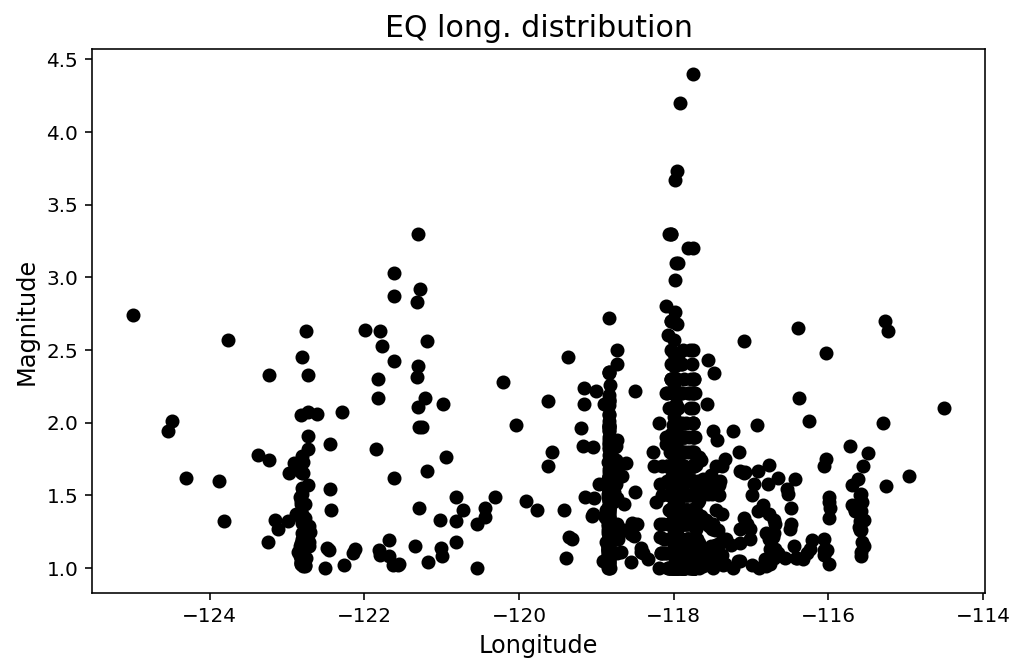

In [26]:
plt.figure(figsize = [8, 5])

plt.scatter(df_EQ_processed["longitude"], df_EQ_processed["mag"], color="black");

# Format title and axis labels
plt.title("EQ long. distribution", fontsize = 15);

plt.xlabel("Longitude", fontsize = 12);
plt.ylabel("Magnitude", fontsize = 12);

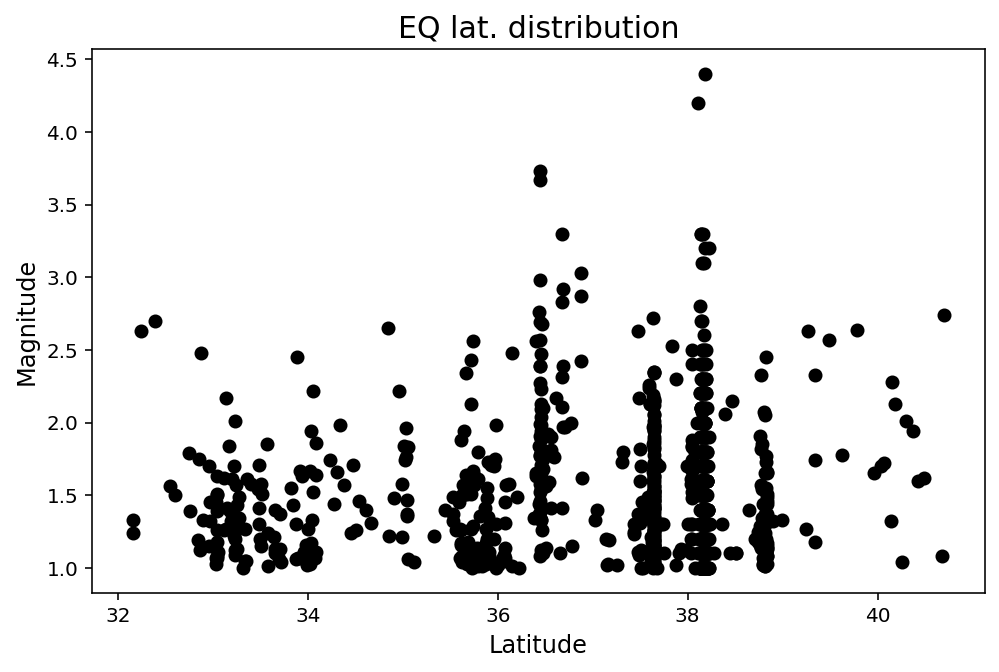

In [27]:
plt.figure(figsize = [8, 5])

plt.scatter(df_EQ_processed["latitude"], df_EQ_processed["mag"], color="black");

# Format title and axis labels
plt.title("EQ lat. distribution", fontsize = 15);

plt.xlabel("Latitude", fontsize = 12);
plt.ylabel("Magnitude", fontsize = 12);

In [28]:
pd.to_datetime(df_EQ_processed["time"], unit="ms") 

0     2020-07-28 23:37:30.470
1     2020-07-28 23:35:56.340
2     2020-07-28 23:27:09.130
3     2020-07-28 23:26:31.730
4     2020-07-28 23:20:42.241
                ...          
956   2020-07-22 00:54:37.150
957   2020-07-22 00:46:54.180
958   2020-07-22 00:29:11.930
959   2020-07-22 00:22:10.520
960   2020-07-22 00:03:33.800
Name: time, Length: 961, dtype: datetime64[ns]

In [29]:
plt.figure(figsize = [8, 5])

plt.scatter(pd.df_EQ_processed["time"], df_EQ_processed["mag"], color="black");

# Format title and axis labels
plt.title("EQ history", fontsize = 15);

plt.xlabel("Time", fontsize = 12);
plt.ylabel("Magnitude", fontsize = 12);

AttributeError: module 'pandas' has no attribute 'df_EQ_processed'

<Figure size 576x360 with 0 Axes>

In [ ]:
df_EQ_processed.sig.describe()